# Standard to Enhanced Data Model - Power Pages
Refer to the following Steps on how to migration from Standard to enhanced

### The Following Steps will be for All Internal & Customer Dev Environments
Production Envrionment Upgrades will have a different Path
1. Confirm if Portal Needs Upgrade
   1. Power Platform Admin Center --> Environments --> Select Environment --> Power Pages Sites --> Website Packages Details 
   2. If Upgrade Needed, upgrade during off Peak hours, if none are required proceed to step 2
2. Create Manul Backup of Environment you are Upgrading
3. Update the Existing Environment for Power Pages Setting from Standard --> Enhanced
   
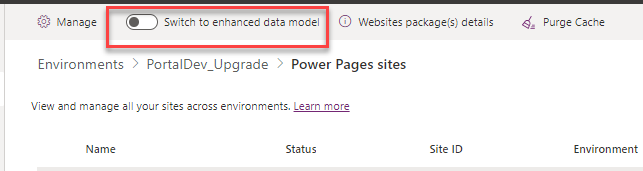

2. Capture Instance URL and Place in Variable Below
   
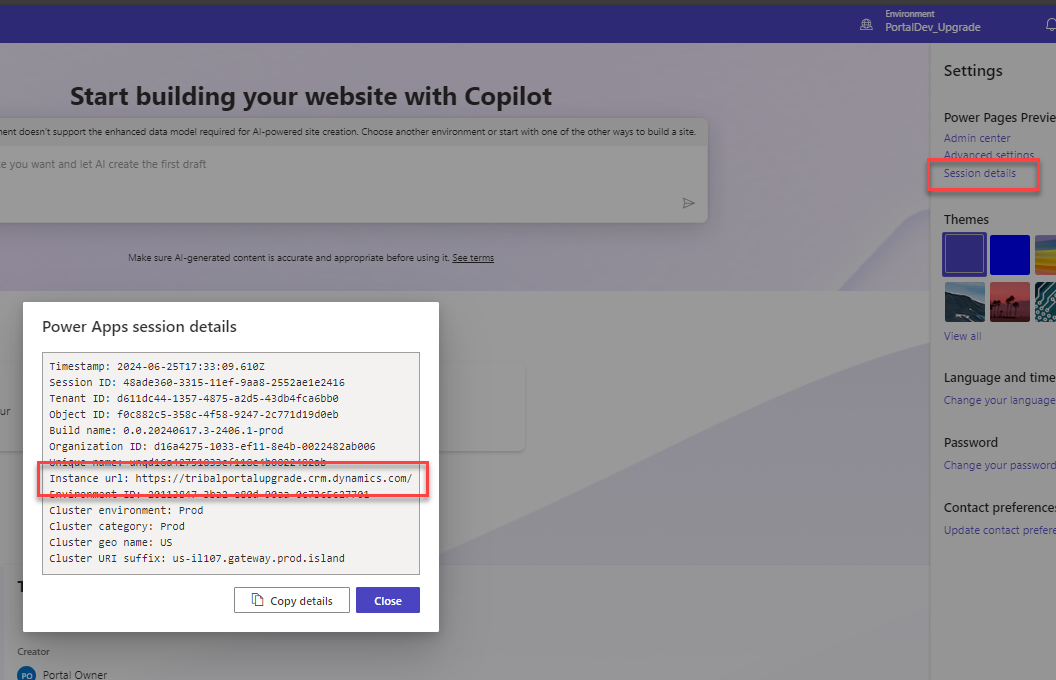

In [3]:
$filepath = "C:\Users\kstudsrud\AppData\Local\Microsoft\PowerAppsCLI\pac.cmd"
# Here we are defining the path where CLI is installed on laptop with a PowerShell variable

# Retrieving all of your Authorizing profiles, should have 1 for each customer / project
& $filepath auth list


Index Active Kind      Name User                                        Cloud  Type            Environment                                  Environment Url
[1]          UNIVERSAL      kstudsrud@arcticit.com                      Public OperatingSystem                                              
[2]          UNIVERSAL      admin@CRM410826.onmicrosoft.com             Public User                                                         
[3]   *      DATAVERSE      admin@CRM410826.onmicrosoft.com             Public User            CRM410826                                    https://orgc9602237.crm.dynamics.com/
[4]          UNIVERSAL      rroberts@ydsp-nsn.gov                       Public User                                                         
[5]          UNIVERSAL      rroberts@ydsp-nsn.gov                       UsGov  User            YDSP TP Dev                                  https://ydsptpdev.crm9.dynamics.com/
[6]          UNIVERSAL      admin@stokesoftwaresolutions.com      

In [4]:
#selection of the Auth profile / tenant that will be used for provisioing
& $filepath auth select --index 10


New default profile:
    * UNIVERSAL                                : kstudsrud@aitrmmdev.onmicrosoft.com      Public https://org7ae49187.crm.dynamics.com/   



## Create Auth Profile (If Needed)

In [4]:
# Create Authorization Profile
& $filepath auth create --environment "https://tribalportalupgrade.crm.dynamics.com/" 

Error: Command cancelled.

## List out Environemnts

In [6]:
& $filepath env list

Connected as kstudsrud@aitrmmdev.onmicrosoft.com
Active Display Name              Environment ID                       Environment URL                                    Unique Name
       AIT - D365 Sales          9eb8bd3a-6f8d-ed46-9a10-92488559a30f https://aitd365sales.crm.dynamics.com/             unq31bcf613dcafee11a564000d3a106
       AIT Customer Hub Capstone 80fe8fc6-6910-ef24-9127-90105d24681d https://ait-customerhub-capstone.crm.dynamics.com/ unqe29e7b35d00aee11a66d000d3a323
       AIT Pipeline Build        b6b98048-2d47-e201-958d-d579543d7314 https://aitpipelinebuild.crm.dynamics.com/         unq8221d630ef53ef11bfdf002248234
       AIT Pipeline Prod         c506cc00-6831-e38e-a9aa-9078cc4ae511 https://aitpipelineprod.crm.dynamics.com/          unq0aad1e69d75fef11a66d002248255
       AIT Pipeline Test         744b098f-6ba5-ef03-ba5f-6e0f936c3314 https://aitpipelinetest.crm.dynamics.com/          unq5bc153f6335fef11bfdf000d3a106
       AIT RMM D365 CE           9593e64f-b25b-e

## Capture the following Variables from Above Env List

In [5]:
## Instance URL from Step 2 Varible for PowerShell Scripts
$InstanceURL = "https://tribalportalupgrade.crm.dynamics.com/"
$EnvironmentID = "20113847-3ba2-e80d-90aa-0c73c5c27701"

## Capture Website ID's

In [16]:
## List Power Pages Environments

& $filepath pages list --environment $EnvironmentID

Connected as kstudsrud@aitrmmdev.onmicrosoft.com
Connected to... PortalDev_Upgrade

Completed listing Power Pages websites

 Index      Website Id                                         Friendly Name                                               

 [1]        4b24d3fd-1933-ef11-8409-0022481c38d3               TribalPortalUpgrade - TribalPortalUpgrade                   
 [2]        f46b70cc-580b-4f1a-87c3-41deb48eb90d               Tribal Platforms                                            


In [6]:
$websiteId = "f46b70cc-580b-4f1a-87c3-41deb48eb90d"

In [14]:
# Run the command and store the Website ID output in a variable
$output = & $filepath pages list --environment "$InstanceURL"

# Parse the output to find the line that contains the Website Id
$websiteLine = $output | Select-String -Pattern '\[\d+\]\s+([a-f0-9-]+)\s+'

# Extract the Website Id from the matched line
if ($websiteLine) {
    $websiteId = ($websiteLine -split '\s+')[2]
}

# Print the Website Id
Write-Output "Website Id: $websiteId"


Website Id: f46b70cc-580b-4f1a-87c3-41deb48eb90d


## Upgrade Model Report for a Site Upgrade

In [7]:
$output = & $filepath pages migrate-datamodel --websiteId $websiteId --mode all  --siteCustomizationReportPath C:\Users\kstudsrud\source\repos\ScriptTemplates\PAC_CLI\Portal_Upgrade
Write-Output $output

Connected as kstudsrud@aitrmmdev.onmicrosoft.com
Connected to... AIT RMM Dev (default)
Microsoft PowerPlatform CLI
Version: 1.32.8+gf89d946
Online documentation: https://aka.ms/PowerPlatformCLI
Feedback, Suggestions, Issues: https://github.com/microsoft/powerplatform-build-tools/discussions

Error: Dataverse Base Package is not on the latest version to migrate. To update the package, visit https://aka.ms/PPAC 
 Migration aborted.



## Update Site Model Version

In [8]:
& $filepath pages migrate-datamodel --websiteId "$websiteId" --environment "$InstanceURL" --checkMigrationStatus

Connected as aitadmin@MPTNAIT.onmicrosoft.com
Connected to... DEV - Tribal Platforms

Checking migration status for website : Tribal Platforms

Current migration status is : Completed


## Update Data Model Version in Portal

### Navigat to Update Power Pages Site and get Portal ID

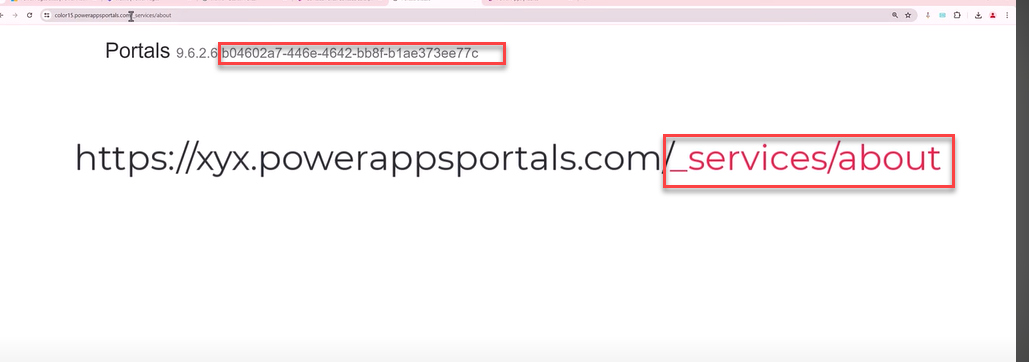

In [9]:
& $filepath pages migrate-datamodel --websiteId f46b70cc-580b-4f1a-87c3-41deb48eb90d  --updateDatamodelversion --portalID ca4d50f8-fa08-4f5f-bb66-c952918102bd

##once command is complete confirm in Site Setup that the data model has been updated to 'Enhanced'

Connected as aitadmin@MPTNAIT.onmicrosoft.com
Connected to... DEV - Tribal Platforms

Checking migration status for website : Tribal Platforms

Current migration status is : Completed

Site is updated to enhanced data model successfully. 
Site is ready to browse now.
